In [19]:
from pathlib import Path
import cv2
import pyvips
import numpy as np
from skimage.color import label2rgb


import matplotlib.pyplot as plt

In [20]:
he_paths = sorted([str(fn) for fn in Path("/root/workdir/toy_data/tile_dataset/he").glob("*.jpeg")])
if_paths = sorted([str(fn) for fn in Path("/root/workdir/toy_data/tile_dataset/if").glob("*.tiff")])
nuclei_paths = sorted([str(fn) for fn in Path("/root/workdir/toy_data/tile_dataset/nuclei").glob("*.tiff")])

len(he_paths), len(if_paths), len(nuclei_paths)

(388, 388, 388)

Text(0.5, 1.0, 'Nuclei')

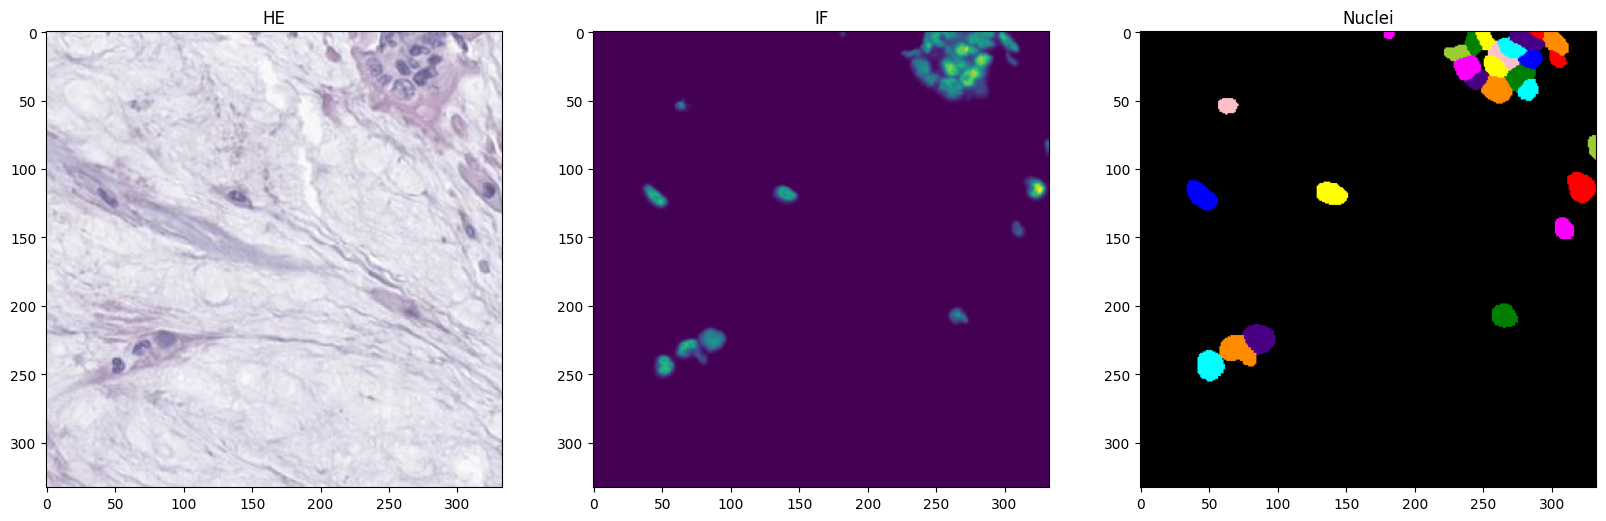

In [21]:
idx = np.random.randint(len(he_paths))

tile_he = cv2.cvtColor(cv2.imread(he_paths[idx]), cv2.COLOR_BGR2RGB)
tile_if = pyvips.Image.new_from_file(if_paths[idx], access="sequential").numpy()
tile_nuclei = pyvips.Image.new_from_file(nuclei_paths[idx], access="sequential").numpy()

fig, axis = plt.subplots(1, 3, figsize=(20, 10))
axis[0].imshow(tile_he)
axis[0].set_title("HE")
axis[1].imshow(tile_if[..., 0])
axis[1].set_title("IF")
axis[2].imshow(label2rgb(tile_nuclei[..., 0]))
axis[2].set_title("Nuclei")

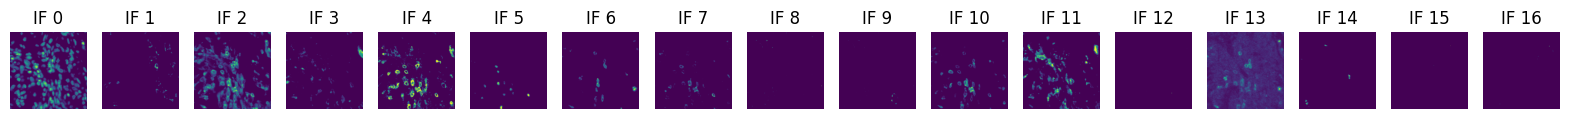

In [4]:
fig, axis = plt.subplots(1, tile_if.shape[-1], figsize=(20, 10))
for i in range(tile_if.shape[-1]):
    axis[i].imshow(tile_if[..., i])
    axis[i].set_title(f"IF {i}")
    axis[i].axis("off")